# Sales Prediction using Python

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
df = pd.DataFrame(pd.read_csv(r"C:\Users\banur\Downloads\advertising.csv"))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
df.shape

(200, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [30]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

## Exploratory Data Analysis

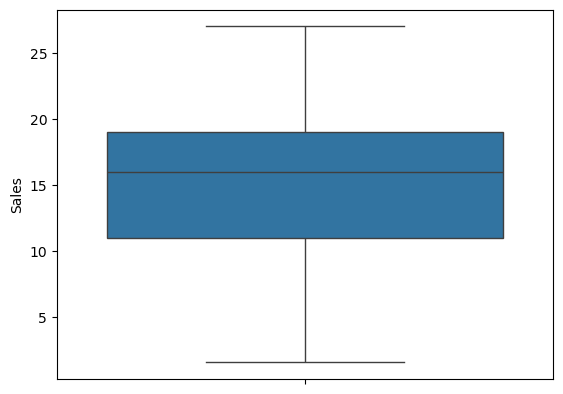

In [35]:
sns.boxplot(df['Sales'])
plt.show()

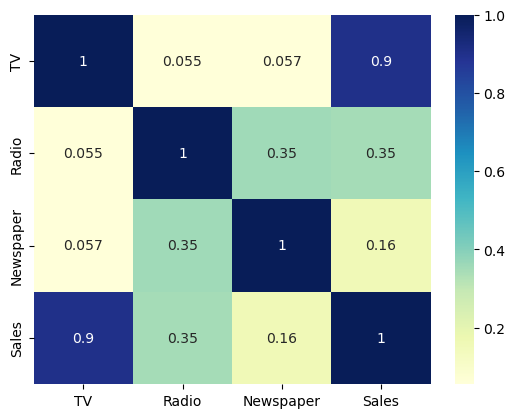

In [39]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Model Building

### Performing Simple Linear Regression

In [43]:
X = df['TV']
y = df['Sales']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [49]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [51]:
import statsmodels.api as sm

In [52]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [55]:
# Print the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [57]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.52e-52
Time:                        12:13:03   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

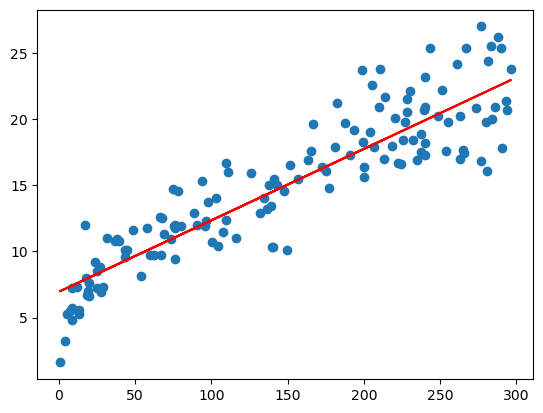

In [61]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

In [64]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [70]:
import warnings
filter.warnings("ignore")

AttributeError: type object 'filter' has no attribute 'warnings'

C:\Users\banur\AppData\Local\Temp\ipykernel_6340\2341084528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


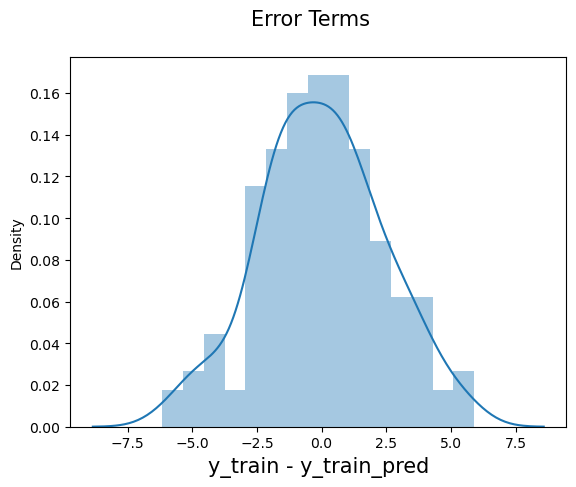

In [66]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)           
plt.xlabel('y_train - y_train_pred', fontsize = 15)       
plt.show()

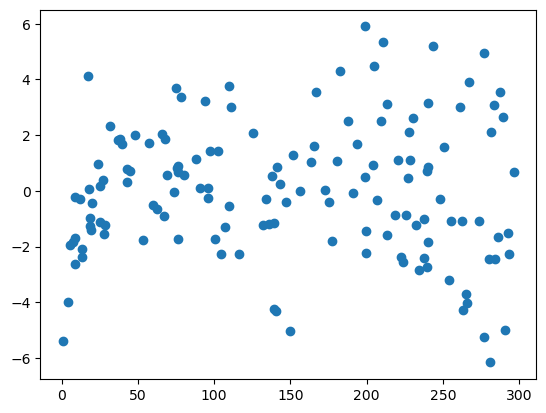

In [68]:
plt.scatter(X_train,res)
plt.show()

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

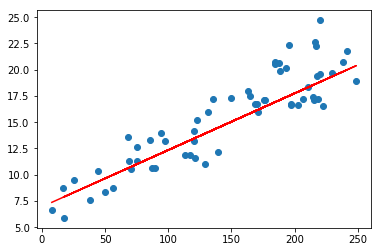

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()